In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("cleaned_data_v2.csv")

In [4]:
pd.set_option('display.max_columns' , None)
df.head()

,Unnamed: 0,Facing,No_Bedroom,No_Bathroom,No_Balcony,Corner_Property,Furnishing,Address,Main Description,Nearby Locations,Features,Dealer,Society Name,Price_in_Crore,price_Per_Sqft_converted,given_area_in_sqft,floor_number,total_floors,AreaType_Built-up Area,AreaType_Carpet Area,AreaType_Super Built-up Area,study room,servant room,store room,pooja room,Overlooking_others,Extracted Sector,Overlooking_main road,Overlooking_sea facing,Overlooking_club,Overlooking_park/garden,Overlooking_pool,Overlooking_lake facing,Overlooking_NA,flat_age
0,0,West,2,2.0,1,NaN,Unfurnished,"0001, sector 90 gurgaon, gurgaon, haryana","Green court society, which is bang on 60-Meter...","['Baba Kanala Chowk', 'Pataudi Rd', 'Gurukul P...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...",ashiana homes,green court,0.61,8840.0,690,14,14,0,0,1,0,0,1,0,1,sector 90,1,0,0,1,0,0,0,Relatively New
1,1,South,2,2.0,1,NaN,Unfurnished,"0001, sector 90 gurgaon, gurgaon, haryana","Green court society, which is bang on 60-Meter...","['Baba Kanala Chowk', 'Pataudi Rd', 'Gurukul P...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...",ashiana homes,green court,0.7,10144.0,690,8,14,0,0,1,0,0,1,0,1,sector 90,1,0,0,1,0,0,0,Relatively New
2,2,North-East,2,2.0,1,Yes,Semifurnished,"sector 70a gurgaon, gurgaon, haryana",Available for sale 2 bhk semi furnished in pyr...,"['Airia Mall', 'Sohna Road', ""St. Angel's Glob...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...",dbn group,pyramid urban homes,0.71,8492.0,836,9,17,0,0,1,0,0,0,0,0,sector 70,1,0,1,1,0,0,0,Relatively New
3,3,East,2,2.0,2,Yes,Semifurnished,"sector 68 gurgaon, gurgaon, haryana",Looking for a 2 bhk property for sale in gurga...,"['Airia Mall', 'Southern Peripheral Road', 'So...","['Power Back-up', 'Security / Fire Alarm', 'In...",shree shyam properties,m3m the marina,1.55,12301.0,1260,9,20,0,0,1,0,0,0,0,0,sector 68,1,0,1,1,1,0,0,New Property
4,4,North,2,2.0,4,Yes,NaN,"101, sector 107 gurgaon, gurgaon, haryana",This 2 bhk apartment is available for sale in ...,"['Signum 107', 'Nora Solomon Medicenter', 'Ind...","['Power Back-up', 'Intercom Facility', 'Lift(s...",jbm buildtech pvt ltd,m3m woodshire,1.3,9516.0,1366,1,14,0,0,1,0,0,0,0,0,sector 107,0,0,1,1,1,0,0,Relatively New


In [5]:
df.isna().sum()

Unnamed: 0                         0
Facing                           901
No_Bedroom                         0
No_Bathroom                        1
No_Balcony                         0
Corner_Property                 4240
Furnishing                       416
Address                            0
Main Description                   3
Nearby Locations                   0
Features                           0
Dealer                             0
Society Name                       0
Price_in_Crore                     0
price_Per_Sqft_converted           2
given_area_in_sqft                 0
floor_number                       0
total_floors                       0
AreaType_Built-up Area             0
AreaType_Carpet Area               0
AreaType_Super Built-up Area       0
study room                         0
servant room                       0
store room                         0
pooja room                         0
Overlooking_others                 0
Extracted Sector                   0
O

In [6]:
# flat_age 

In [7]:
status_mapping = {
    'Relatively New': 3,
    'New Property': 1,
    'Moderately Old': 4,
    'Under Construction': 2,
    'Old Property': 5,
    'Undefined': 6
}

df['flat_age'] = df['flat_age'].replace(status_mapping)

C:\Users\dell\AppData\Local\Temp\ipykernel_14784\657948135.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['flat_age'] = df['flat_age'].replace(status_mapping)


In [8]:
df['sector_num'] = df['Extracted Sector'].str.extract(r'(\d+)').astype(int)


In [9]:
df['Furnishing'].value_counts()

Furnishing
Semifurnished    9344
Unfurnished      2158
Furnished         529
Name: count, dtype: int64

In [10]:
status_mapping_Furnishing = {
    'Unfurnished': 0,
    'Furnished': 2,

    'Semifurnished': 1,

}

df['Furnishing'] = df['Furnishing'].replace(status_mapping_Furnishing)

C:\Users\dell\AppData\Local\Temp\ipykernel_14784\3401984022.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Furnishing'] = df['Furnishing'].replace(status_mapping_Furnishing)


In [11]:
df = df.drop(columns = ['Extracted Sector'])

In [12]:
df.isna().sum()


Unnamed: 0                         0
Facing                           901
No_Bedroom                         0
No_Bathroom                        1
No_Balcony                         0
Corner_Property                 4240
Furnishing                       416
Address                            0
Main Description                   3
Nearby Locations                   0
Features                           0
Dealer                             0
Society Name                       0
Price_in_Crore                     0
price_Per_Sqft_converted           2
given_area_in_sqft                 0
floor_number                       0
total_floors                       0
AreaType_Built-up Area             0
AreaType_Carpet Area               0
AreaType_Super Built-up Area       0
study room                         0
servant room                       0
store room                         0
pooja room                         0
Overlooking_others                 0
Overlooking_main road              0
O

In [13]:
df[df['No_Bathroom'].isna() == True]

,Unnamed: 0,Facing,No_Bedroom,No_Bathroom,No_Balcony,Corner_Property,Furnishing,Address,Main Description,Nearby Locations,Features,Dealer,Society Name,Price_in_Crore,price_Per_Sqft_converted,given_area_in_sqft,floor_number,total_floors,AreaType_Built-up Area,AreaType_Carpet Area,AreaType_Super Built-up Area,study room,servant room,store room,pooja room,Overlooking_others,Overlooking_main road,Overlooking_sea facing,Overlooking_club,Overlooking_park/garden,Overlooking_pool,Overlooking_lake facing,Overlooking_NA,flat_age,sector_num
6031,6031,NaN,3,NaN,0,NaN,NaN,"000, sector 47 gurgaon, gurgaon, haryana",Cghs the tarun sector 47 gurgaon 3 bhk 3 bathr...,"['Raheja Mall', 'Rajiv Chowk Mosque', 'Standar...","['Power Back-up', 'Feng Shui / Vaastu Complian...",perfect homes realty,tarun cghs,2.4,10212.0,2350,7,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,4,47


In [14]:
df[df['price_Per_Sqft_converted'].isna() == True]

,Unnamed: 0,Facing,No_Bedroom,No_Bathroom,No_Balcony,Corner_Property,Furnishing,Address,Main Description,Nearby Locations,Features,Dealer,Society Name,Price_in_Crore,price_Per_Sqft_converted,given_area_in_sqft,floor_number,total_floors,AreaType_Built-up Area,AreaType_Carpet Area,AreaType_Super Built-up Area,study room,servant room,store room,pooja room,Overlooking_others,Overlooking_main road,Overlooking_sea facing,Overlooking_club,Overlooking_park/garden,Overlooking_pool,Overlooking_lake facing,Overlooking_NA,flat_age,sector_num
6444,6444,North-East,5,6.0,4,NaN,1.0,"or sale - penthouse at ambience caitriona, sec...","Penthouse on sale, Caitriona 7 star living at ...","['Moulsari Avenue Metro Station', 'Phase 3, Cy...","['Power Back-up', 'Intercom Facility', 'Lift(s...",sharma estates,ambience caitriona,Price on Request,NaN,13500,11,12,0,0,1,1,1,0,1,0,0,0,0,0,0,0,1,3,24
11697,11697,North-East,4,7.0,3,NaN,0.0,for sale - 4 bhk luxury apartment in dlf the c...,This is a ready to move in 4 bhk flat for sale...,"['Sector 42-43 Rapid Metro', 'Sector 53-54 Rap...","['Intercom Facility', 'Lift(s)', 'Feng Shui / ...",sharma estates,dlf the camellias,Price on Request,NaN,7430,15,38,0,0,1,1,1,0,1,0,0,0,1,1,1,0,0,1,42


In [15]:
# for bathroom column
df = df.drop(index=6031)

In [16]:
df['Price_in_Crore'].unique()

array(['0.61', '0.7', '0.71', '1.55', '1.3', '0.51', '0.59', '1.7',
       '1.64', '1.75', '1.4', '3.4', '2.42', '1.1', '1.15', '1.0', '0.73',
       '1.67', '1.68', '1.8', '0.99', '2.7', '2.25', '2.6', '1.32',
       '1.85', '1.28', '0.76', '1.86', '1.95', '1.82', '1.35', '1.9',
       '1.94', '1.22', '1.2', '0.68', '1.6', '2.26', '0.64', '0.57',
       '1.45', '0.46', '0.55', '0.52', '0.96', '1.08', '0.54', '1.57',
       '0.6475', '0.6', '2.05', '1.5', '1.62', '0.74', '0.75', '1.65',
       '2.4', '2.3', '2.35', '2.2', '0.725', '0.72', '0.625', '1.51',
       '1.88', '0.65', '0.62', '1.05', '1.18', '0.95', '0.525', '1.81',
       '1.71', '1.99', '1.61', '2.14', '2.16', '3.2', '1.89', '0.45',
       '2.1', '1.69', '2.23', '1.98', '3.3', '2.36', '2.8', '0.44',
       '2.07', '1.46', '1.84', '2.08', '1.74', '2.57', '1.38', '3.5',
       '2.51', '2.96', '1.25', '0.5', '2.58', '1.19', '0.85', '2.28',
       '0.97', '2.09', '0.88', '0.768', '0.8540000000000001', '2.15',
       '2.5', '2.2

In [17]:
df['Price_in_Crore'] = df['Price_in_Crore'].replace('Price on Request', np.nan)

df['Price_in_Crore'] = df['Price_in_Crore'].replace('Available on Request', np.nan)
# Convert column to float type
df['Price_in_Crore'] = df['Price_in_Crore'].astype(float)

In [18]:
df.columns

Index(['Unnamed: 0', 'Facing', 'No_Bedroom', 'No_Bathroom', 'No_Balcony',
       'Corner_Property', 'Furnishing', 'Address', 'Main Description',
       'Nearby Locations', 'Features', 'Dealer', 'Society Name',
       'Price_in_Crore', 'price_Per_Sqft_converted', 'given_area_in_sqft',
       'floor_number', 'total_floors', 'AreaType_Built-up Area',
       'AreaType_Carpet Area', 'AreaType_Super Built-up Area', 'study room',
       'servant room', 'store room', 'pooja room', 'Overlooking_others',
       'Overlooking_main road', 'Overlooking_sea facing', 'Overlooking_club',
       'Overlooking_park/garden', 'Overlooking_pool',
       'Overlooking_lake facing', 'Overlooking_NA', 'flat_age', 'sector_num'],
      dtype='object')

In [19]:
df['Corner_Property'].value_counts()

Corner_Property
Yes    8207
Name: count, dtype: int64

In [20]:
df['Corner_Property'].fillna("No" , inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_14784\719434911.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Corner_Property'].fillna("No" , inplace=True)


In [21]:
df['Main Description'].fillna("Description not Available" , inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_14784\1552046540.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Main Description'].fillna("Description not Available" , inplace=True)


In [22]:
df.isna().sum()

Unnamed: 0                        0
Facing                          900
No_Bedroom                        0
No_Bathroom                       0
No_Balcony                        0
Corner_Property                   0
Furnishing                      415
Address                           0
Main Description                  0
Nearby Locations                  0
Features                          0
Dealer                            0
Society Name                      0
Price_in_Crore                    8
price_Per_Sqft_converted          2
given_area_in_sqft                0
floor_number                      0
total_floors                      0
AreaType_Built-up Area            0
AreaType_Carpet Area              0
AreaType_Super Built-up Area      0
study room                        0
servant room                      0
store room                        0
pooja room                        0
Overlooking_others                0
Overlooking_main road             0
Overlooking_sea facing      

In [23]:
df = df.drop(columns=['Unnamed: 0'])

In [24]:
df.columns


Index(['Facing', 'No_Bedroom', 'No_Bathroom', 'No_Balcony', 'Corner_Property',
       'Furnishing', 'Address', 'Main Description', 'Nearby Locations',
       'Features', 'Dealer', 'Society Name', 'Price_in_Crore',
       'price_Per_Sqft_converted', 'given_area_in_sqft', 'floor_number',
       'total_floors', 'AreaType_Built-up Area', 'AreaType_Carpet Area',
       'AreaType_Super Built-up Area', 'study room', 'servant room',
       'store room', 'pooja room', 'Overlooking_others',
       'Overlooking_main road', 'Overlooking_sea facing', 'Overlooking_club',
       'Overlooking_park/garden', 'Overlooking_pool',
       'Overlooking_lake facing', 'Overlooking_NA', 'flat_age', 'sector_num'],
      dtype='object')

In [25]:
replacements = {
    'Yes': '1',
    'No': '0'
}

In [26]:
df['Corner_Property'] = df['Corner_Property'].replace(replacements)

In [27]:
df[df['Furnishing'].isna() == True]



,Facing,No_Bedroom,No_Bathroom,No_Balcony,Corner_Property,Furnishing,Address,Main Description,Nearby Locations,Features,Dealer,Society Name,Price_in_Crore,price_Per_Sqft_converted,given_area_in_sqft,floor_number,total_floors,AreaType_Built-up Area,AreaType_Carpet Area,AreaType_Super Built-up Area,study room,servant room,store room,pooja room,Overlooking_others,Overlooking_main road,Overlooking_sea facing,Overlooking_club,Overlooking_park/garden,Overlooking_pool,Overlooking_lake facing,Overlooking_NA,flat_age,sector_num
4,North,2,2.0,4,1,NaN,"101, sector 107 gurgaon, gurgaon, haryana",This 2 bhk apartment is available for sale in ...,"['Signum 107', 'Nora Solomon Medicenter', 'Ind...","['Power Back-up', 'Intercom Facility', 'Lift(s...",jbm buildtech pvt ltd,m3m woodshire,1.30,9516.0,1366,1,14,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,3,107
19,South-West,2,2.0,3,0,NaN,"higher floor, sector 91 gurgaon, gurgaon, haryana","Anantraj maceoSec 91New gurgaon , ready to mov...","['Manish Gallexie 91', 'Dwarka Expressway', 'R...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...",akay estate,tarc maceo,1.30,7122.0,1404,11,13,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,3,91
41,North-East,2,2.0,2,1,NaN,"sector 67a gurgaon, gurgaon, haryana",This 2 bhk apartment is available for sale in ...,"['Huda Metro Station (Gurugram)', 'Paras Trini...","['Power Back-up', 'Intercom Facility', 'Lift(s...",search my property,ireo the corridors,1.80,12129.0,1484,2,19,0,0,1,1,0,0,0,1,1,1,1,1,1,0,0,3,67
82,South,2,2.0,3,1,NaN,"sector 81 gurgaon, gurgaon, haryana",This 2 bhk flat is located in bestech park vie...,"['Metro Station Kankrola sec 87', 'Sapphire 83...","['Security / Fire Alarm', 'Power Back-up', 'Fe...",agastya real estate,bestech park view ananda,1.35,8829.0,1529,15,15,0,0,1,0,0,0,0,1,1,1,1,1,1,0,0,3,81
140,North-East,2,2.0,2,0,NaN,"sector 103 gurgaon, gurgaon, haryana",This 2 bhk apartment is available for sale in ...,"['Gurgaon Dreamz Mall', 'HUDA Market, Sector 1...","['Lift(s)', 'Swimming Pool', 'Park', 'Shopping...",dream key infratech,indiabulls centrum park,1.50,9453.0,1481,7,18,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,3,103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12274,South,2,2.0,3,1,NaN,"sector 81 gurgaon, gurgaon, haryana",This 2 bhk flat is located in bestech park vie...,"['Metro Station Kankrola sec 87', 'Sapphire 83...","['Security / Fire Alarm', 'Power Back-up', 'Fe...",agastya real estate,bestech park view ananda,1.35,8829.0,1529,15,15,0,0,1,0,0,0,0,1,1,1,1,1,1,0,0,3,81
12302,North-East,2,2.0,2,1,NaN,"sector 68 gurgaon, gurgaon, haryana",Pareena mi casa is one of the most popular des...,"['Sector 55-56 Metro Station', 'Airia Mall', '...","['Power Back-up', 'Feng Shui / Vaastu Complian...",bhavi realty,pareena mi casa,1.32,10602.0,1245,12,35,1,0,0,0,0,0,0,1,1,1,1,1,1,0,0,3,68
12366,East,2,2.0,3,0,NaN,"1310, sector 65 gurgaon, gurgaon, haryana","This 2 bhk flat is located in m3m heights, whi...","['Rapid Metro Sector 56', 'M3m 65th Avenue Mal...","['Centrally Air Conditioned', 'Water purifier'...",aryan realtors,m3m heights,2.36,18000.0,1310,22,34,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,65
12412,NaN,3,3.0,2,0,NaN,"sector 99 gurgaon, gurgaon, haryana","Sovereign park, sector 99, near dwarka express...","['The Esplanade Mall', 'Dwarka Expressway', 'K...","['Power Back-up', 'Feng Shui / Vaastu Complian...",prime realty,vatika sovereign park,2.92,10500.0,2780,3,12,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,2,99


In [28]:
df.sample(3)

,Facing,No_Bedroom,No_Bathroom,No_Balcony,Corner_Property,Furnishing,Address,Main Description,Nearby Locations,Features,Dealer,Society Name,Price_in_Crore,price_Per_Sqft_converted,given_area_in_sqft,floor_number,total_floors,AreaType_Built-up Area,AreaType_Carpet Area,AreaType_Super Built-up Area,study room,servant room,store room,pooja room,Overlooking_others,Overlooking_main road,Overlooking_sea facing,Overlooking_club,Overlooking_park/garden,Overlooking_pool,Overlooking_lake facing,Overlooking_NA,flat_age,sector_num
9699,East,5,6.0,4,1,2.0,"1204, sector 70 gurgaon, gurgaon, haryana",5 bhk penthouse available for sale in tulip iv...,"['Iffco Chowk Metro Station', 'Reach 3 Roads S...","['Water purifier', 'Centrally Air Conditioned'...",the property experts,tulip ivory,5.45,14155.0,3850,12,12,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,4,70
7489,North-West,3,3.0,3,0,0.0,"sector 90 gurgaon, gurgaon, haryana",Call for more details 9810six16983.. This 3 bh...,"['Manish Gallexie 91', 'NH-8 IMT Manesar', 'RH...","['Security / Fire Alarm', 'Intercom Facility',...",square feet professionals,dlf new town heights 1,1.92,9948.0,1930,12,19,0,0,1,0,1,1,1,0,0,0,1,1,0,0,0,4,90
196,East,2,2.0,3,1,1.0,"sector 102 gurgaon, gurgaon, haryana",This 2 bhk apartment is available for sale in ...,"['IFFCO Chowk Metro Station', 'The Esplanade M...","['Centrally Air Conditioned', 'Water purifier'...",dream home associates,shapoorji pallonji joyville gurugram,1.70,12601.0,1349,6,26,0,0,1,0,0,0,0,1,1,1,1,1,1,0,0,1,102


In [29]:
df[['Corner_Property']] = df[['Corner_Property']].astype(int)

In [30]:
df.isna().sum()

Facing                          900
No_Bedroom                        0
No_Bathroom                       0
No_Balcony                        0
Corner_Property                   0
Furnishing                      415
Address                           0
Main Description                  0
Nearby Locations                  0
Features                          0
Dealer                            0
Society Name                      0
Price_in_Crore                    8
price_Per_Sqft_converted          2
given_area_in_sqft                0
floor_number                      0
total_floors                      0
AreaType_Built-up Area            0
AreaType_Carpet Area              0
AreaType_Super Built-up Area      0
study room                        0
servant room                      0
store room                        0
pooja room                        0
Overlooking_others                0
Overlooking_main road             0
Overlooking_sea facing            0
Overlooking_club            

In [31]:
df.sample(3)

,Facing,No_Bedroom,No_Bathroom,No_Balcony,Corner_Property,Furnishing,Address,Main Description,Nearby Locations,Features,Dealer,Society Name,Price_in_Crore,price_Per_Sqft_converted,given_area_in_sqft,floor_number,total_floors,AreaType_Built-up Area,AreaType_Carpet Area,AreaType_Super Built-up Area,study room,servant room,store room,pooja room,Overlooking_others,Overlooking_main road,Overlooking_sea facing,Overlooking_club,Overlooking_park/garden,Overlooking_pool,Overlooking_lake facing,Overlooking_NA,flat_age,sector_num
11476,North-East,3,3.0,3,1,1.0,"2204, sector 68 gurgaon, gurgaon, haryana",This lovely 3 bhk apartment/flat in sector 68 ...,"['Sector 55-56 Metro Station', 'Airia Mall', '...","['Centrally Air Conditioned', 'Water purifier'...",agnayi property management company,pareena mi casa,1.8,15000.0,1705,18,35,0,0,1,0,0,0,0,0,1,0,1,1,1,0,0,1,68
2241,East,1,1.0,2,0,2.0,"ss34, sector 71 gurgaon, gurgaon, haryana",Looking for a 1 bhk property for sale in gurga...,"['Millennium City Centre', 'Omaxe City Centre'...","['Power Back-up', 'Lift(s)', 'Park']",professionista global consultants private limited,signature andour heights,0.5,13643.0,366,1,13,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,3,71
6914,North,4,4.0,4,0,1.0,"sector 42 gurgaon, gurgaon, haryana",Looking for a 4 bhk property for sale in gurga...,"['Huda City Centre Metro Station', 'Sector 53 ...","['Security / Fire Alarm', 'Intercom Facility',...",khushal sethi housing solutions pvt. ltd.,dlf the magnolias,40.0,57812.0,6400,15,24,0,0,1,0,0,0,0,0,1,0,1,1,1,0,0,4,42


In [32]:
df.columns

Index(['Facing', 'No_Bedroom', 'No_Bathroom', 'No_Balcony', 'Corner_Property',
       'Furnishing', 'Address', 'Main Description', 'Nearby Locations',
       'Features', 'Dealer', 'Society Name', 'Price_in_Crore',
       'price_Per_Sqft_converted', 'given_area_in_sqft', 'floor_number',
       'total_floors', 'AreaType_Built-up Area', 'AreaType_Carpet Area',
       'AreaType_Super Built-up Area', 'study room', 'servant room',
       'store room', 'pooja room', 'Overlooking_others',
       'Overlooking_main road', 'Overlooking_sea facing', 'Overlooking_club',
       'Overlooking_park/garden', 'Overlooking_pool',
       'Overlooking_lake facing', 'Overlooking_NA', 'flat_age', 'sector_num'],
      dtype='object')

In [33]:
df.loc[df['Furnishing'].notna(), 'Furnishing'] = df.loc[df['Furnishing'].notna(), 'Furnishing'].astype(int)




In [34]:
df['Furnishing'].value_counts()

Furnishing
1.0    9344
0.0    2158
2.0     529
Name: count, dtype: int64

<Axes: ylabel='proportion'>

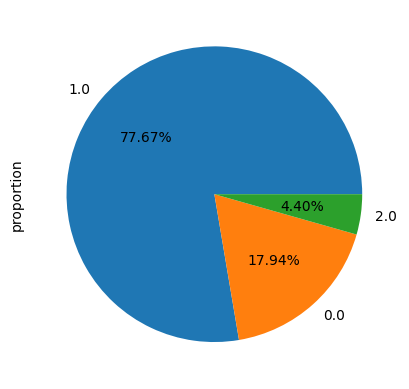

In [35]:
df['Furnishing'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

In [36]:
df_Furnishing = df[['No_Bedroom', 'No_Bathroom', 'No_Balcony', 'Corner_Property', 'Furnishing', 'Price_in_Crore',
       'price_Per_Sqft_converted', 'given_area_in_sqft', 'floor_number',
       'total_floors', 'AreaType_Built-up Area', 'AreaType_Carpet Area',
       'AreaType_Super Built-up Area', 'study room', 'servant room',
       'store room', 'pooja room', 'Overlooking_others',
       'Overlooking_main road', 'Overlooking_sea facing', 'Overlooking_club',
       'Overlooking_park/garden', 'Overlooking_pool',
       'Overlooking_lake facing', 'Overlooking_NA', 'flat_age', 'sector_num']]

In [37]:
df_Furnishing.head()

,No_Bedroom,No_Bathroom,No_Balcony,Corner_Property,Furnishing,Price_in_Crore,price_Per_Sqft_converted,given_area_in_sqft,floor_number,total_floors,AreaType_Built-up Area,AreaType_Carpet Area,AreaType_Super Built-up Area,study room,servant room,store room,pooja room,Overlooking_others,Overlooking_main road,Overlooking_sea facing,Overlooking_club,Overlooking_park/garden,Overlooking_pool,Overlooking_lake facing,Overlooking_NA,flat_age,sector_num
0,2,2.0,1,0,0.0,0.61,8840.0,690,14,14,0,0,1,0,0,1,0,1,1,0,0,1,0,0,0,3,90
1,2,2.0,1,0,0.0,0.70,10144.0,690,8,14,0,0,1,0,0,1,0,1,1,0,0,1,0,0,0,3,90
2,2,2.0,1,1,1.0,0.71,8492.0,836,9,17,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,3,70
3,2,2.0,2,1,1.0,1.55,12301.0,1260,9,20,0,0,1,0,0,0,0,0,1,0,1,1,1,0,0,1,68
4,2,2.0,4,1,NaN,1.30,9516.0,1366,1,14,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,3,107


In [38]:
df_Furnishing.shape

(12446, 27)

In [39]:
x_test = df_Furnishing[df_Furnishing['Furnishing'].isna() == True].drop(columns=['Furnishing'])

In [40]:
x_test.sample(6)

,No_Bedroom,No_Bathroom,No_Balcony,Corner_Property,Price_in_Crore,price_Per_Sqft_converted,given_area_in_sqft,floor_number,total_floors,AreaType_Built-up Area,AreaType_Carpet Area,AreaType_Super Built-up Area,study room,servant room,store room,pooja room,Overlooking_others,Overlooking_main road,Overlooking_sea facing,Overlooking_club,Overlooking_park/garden,Overlooking_pool,Overlooking_lake facing,Overlooking_NA,flat_age,sector_num
5083,3,3.0,3,0,5.20,24821.000,2095,5,33,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,59
3407,3,4.0,4,1,2.75,18359.000,1955,8,20,0,0,1,0,1,0,1,0,0,0,1,1,1,0,0,3,109
186,2,2.0,2,0,3.50,20114.000,1740,18,34,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,2,36
11861,2,2.0,1,0,0.70,1277084.016,635,4,14,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,76
5075,4,4.0,4,1,4.30,17016.000,2527,20,25,0,0,1,0,0,0,0,1,1,1,1,1,1,0,0,3,62
1630,2,2.0,2,0,0.65,10603.000,613,7,14,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,3,103


In [41]:
x_train = df_Furnishing[df_Furnishing['Furnishing'].isna() == False].drop(columns=['Furnishing'])

In [42]:
y_train = df_Furnishing[df_Furnishing['Furnishing'].isna() == False]['Furnishing']

In [43]:
y_train = y_train.astype(int)

In [44]:
y_train.sample(7)

1708     0
9568     1
1816     0
4396     1
10537    1
1515     1
198      1
Name: Furnishing, dtype: int32

In [45]:
y_train.value_counts()

Furnishing
1    9344
0    2158
2     529
Name: count, dtype: int64

In [46]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Define hyperparameters
params = {
    'n_estimators': 500,
    'learning_rate': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'gamma': 0,
    'scale_pos_weight': 1,
    'eval_metric': 'logloss'
}

xgb_model = XGBClassifier(**params)

xgb_model.fit(x_train, y_train)

y_pred = xgb_model.predict(x_test)

x_test['Furnishing'] = y_pred




C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [14:53:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


In [47]:
x_test.sample(5)

,No_Bedroom,No_Bathroom,No_Balcony,Corner_Property,Price_in_Crore,price_Per_Sqft_converted,given_area_in_sqft,floor_number,total_floors,AreaType_Built-up Area,AreaType_Carpet Area,AreaType_Super Built-up Area,study room,servant room,store room,pooja room,Overlooking_others,Overlooking_main road,Overlooking_sea facing,Overlooking_club,Overlooking_park/garden,Overlooking_pool,Overlooking_lake facing,Overlooking_NA,flat_age,sector_num,Furnishing
2013,4,5.0,4,0,2.77,10707.000,2475,14,19,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,3,92,1
3462,3,3.0,3,1,2.25,12893.000,1745,22,24,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,3,109,0
10990,3,4.0,2,1,1.79,8585.000,2085,9,21,0,0,1,1,0,0,0,1,1,0,1,1,1,0,0,1,89,1
4562,3,3.0,2,0,3.25,3673527.156,1025,14,34,0,1,0,0,0,0,0,0,1,0,1,1,1,0,0,1,106,1
5076,3,3.0,3,0,4.00,17683.000,2262,12,26,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,2,62,1


In [48]:
x_test.index

Index([    4,    19,    41,    82,   140,   152,   173,   186,   192,   210,
       ...
       11861, 11864, 12101, 12107, 12171, 12274, 12302, 12366, 12412, 12440],
      dtype='int64', length=415)

In [49]:
df.loc[x_test.index , 'Furnishing'] = x_test['Furnishing']

In [50]:
df[df['price_Per_Sqft_converted'].isna() == True]

,Facing,No_Bedroom,No_Bathroom,No_Balcony,Corner_Property,Furnishing,Address,Main Description,Nearby Locations,Features,Dealer,Society Name,Price_in_Crore,price_Per_Sqft_converted,given_area_in_sqft,floor_number,total_floors,AreaType_Built-up Area,AreaType_Carpet Area,AreaType_Super Built-up Area,study room,servant room,store room,pooja room,Overlooking_others,Overlooking_main road,Overlooking_sea facing,Overlooking_club,Overlooking_park/garden,Overlooking_pool,Overlooking_lake facing,Overlooking_NA,flat_age,sector_num
6444,North-East,5,6.0,4,0,1.0,"or sale - penthouse at ambience caitriona, sec...","Penthouse on sale, Caitriona 7 star living at ...","['Moulsari Avenue Metro Station', 'Phase 3, Cy...","['Power Back-up', 'Intercom Facility', 'Lift(s...",sharma estates,ambience caitriona,NaN,NaN,13500,11,12,0,0,1,1,1,0,1,0,0,0,0,0,0,0,1,3,24
11697,North-East,4,7.0,3,0,0.0,for sale - 4 bhk luxury apartment in dlf the c...,This is a ready to move in 4 bhk flat for sale...,"['Sector 42-43 Rapid Metro', 'Sector 53-54 Rap...","['Intercom Facility', 'Lift(s)', 'Feng Shui / ...",sharma estates,dlf the camellias,NaN,NaN,7430,15,38,0,0,1,1,1,0,1,0,0,0,1,1,1,0,0,1,42


In [51]:
df = df.drop(index=6444)

In [52]:
df = df.drop(index=11697)

In [53]:
df.isna().sum()

Facing                          900
No_Bedroom                        0
No_Bathroom                       0
No_Balcony                        0
Corner_Property                   0
Furnishing                        0
Address                           0
Main Description                  0
Nearby Locations                  0
Features                          0
Dealer                            0
Society Name                      0
Price_in_Crore                    6
price_Per_Sqft_converted          0
given_area_in_sqft                0
floor_number                      0
total_floors                      0
AreaType_Built-up Area            0
AreaType_Carpet Area              0
AreaType_Super Built-up Area      0
study room                        0
servant room                      0
store room                        0
pooja room                        0
Overlooking_others                0
Overlooking_main road             0
Overlooking_sea facing            0
Overlooking_club            

In [54]:
df[df[['Price_in_Crore' ,'price_Per_Sqft_converted' ,'given_area_in_sqft']]['Price_in_Crore'].isna() == True]

,Facing,No_Bedroom,No_Bathroom,No_Balcony,Corner_Property,Furnishing,Address,Main Description,Nearby Locations,Features,Dealer,Society Name,Price_in_Crore,price_Per_Sqft_converted,given_area_in_sqft,floor_number,total_floors,AreaType_Built-up Area,AreaType_Carpet Area,AreaType_Super Built-up Area,study room,servant room,store room,pooja room,Overlooking_others,Overlooking_main road,Overlooking_sea facing,Overlooking_club,Overlooking_park/garden,Overlooking_pool,Overlooking_lake facing,Overlooking_NA,flat_age,sector_num
3399,North-East,5,6.0,4,0,1.0,"sector 66 gurgaon, gurgaon, haryana",This is a 5bhk luxurious villa available for s...,"['Sector 55-56 Rapid Metro Station', 'HUB 66',...","['Centrally Air Conditioned', 'Water purifier'...",realistic realtors pvt ltd,emaar mgf marbella,NaN,20935.0,8120,1,3,0,1,0,1,1,1,1,0,1,0,1,1,1,0,0,3,66
3920,North-East,4,6.0,2,0,1.0,"sector 54 gurgaon, gurgaon, haryana",La lagune in sector 54 gurgaon is a ready-To-M...,"['Sector 54 Chowk Metro Station', 'Ardee Mall'...","['Centrally Air Conditioned', 'Water purifier'...",realistic realtors pvt ltd,la lagune,NaN,25316.0,3160,15,18,0,0,1,1,1,1,1,0,1,0,1,1,1,0,0,4,54
4188,North-East,5,4.0,4,0,1.0,"dlf phase 3, gurgaon, haryana",This is a 5bhk apartment available for sale.\n...,"['Moulsari Avenue Metro Station', 'Phase 3, Cy...","['Water purifier', 'Centrally Air Conditioned'...",realistic realtors pvt ltd,ambience caitriona,NaN,19375.0,8000,6,11,0,0,1,1,1,1,1,0,1,0,1,1,1,0,0,4,24
4669,East,4,4.0,3,0,1.0,"sector 54 gurgaon, gurgaon, haryana",Dlf the belaire in sector 54 gurgaon is a read...,"['Sector 42-43 Metro station', 'Horizon 1 Mall...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...",realistic realtors pvt ltd,dlf the belaire,NaN,35714.0,4200,24,30,0,0,1,1,1,1,1,0,1,0,1,1,1,0,0,4,54
4670,North-East,4,6.0,2,0,1.0,"sector 54 gurgaon, gurgaon, haryana",4bhk luxurious apartment available for sale.\n...,"['Shoppers Stop', 'Suncity Market', 'Central P...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...",realistic realtors pvt ltd,salcon the verandas,NaN,33370.0,4495,12,18,0,0,1,0,1,0,0,0,1,0,1,1,1,0,0,4,54
9738,North-East,4,6.0,3,0,1.0,"sector 54 gurgaon, gurgaon, haryana",This is a luxurious aravalli facing 3bhk apart...,"['Sector 53-54 Metro Station', 'Ardee Mall', '...","['Water purifier', 'Centrally Air Conditioned'...",realistic realtors pvt ltd,dlf the crest,NaN,48172.0,3529,8,36,0,0,1,1,1,1,1,0,1,0,1,1,1,0,0,4,54


In [55]:
df['Price_in_Crore'] = df['Price_in_Crore'].fillna((df['price_Per_Sqft_converted'] * df['given_area_in_sqft'])/10000000)

In [56]:
df.isna().sum()

Facing                          900
No_Bedroom                        0
No_Bathroom                       0
No_Balcony                        0
Corner_Property                   0
Furnishing                        0
Address                           0
Main Description                  0
Nearby Locations                  0
Features                          0
Dealer                            0
Society Name                      0
Price_in_Crore                    0
price_Per_Sqft_converted          0
given_area_in_sqft                0
floor_number                      0
total_floors                      0
AreaType_Built-up Area            0
AreaType_Carpet Area              0
AreaType_Super Built-up Area      0
study room                        0
servant room                      0
store room                        0
pooja room                        0
Overlooking_others                0
Overlooking_main road             0
Overlooking_sea facing            0
Overlooking_club            

In [57]:
df['Furnishing'].value_counts()

Furnishing
1.0    9691
0.0    2221
2.0     532
Name: count, dtype: int64

<Axes: ylabel='proportion'>

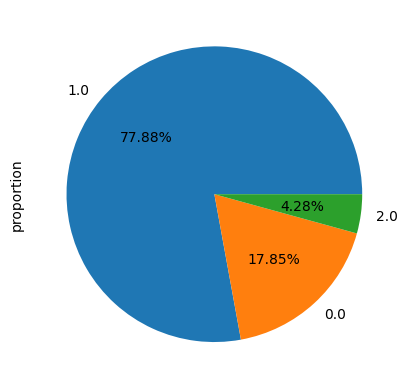

In [58]:
df['Furnishing'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

In [59]:
df['Facing'].value_counts()

Facing
North-East    4053
East          3634
North         1646
West           742
North-West     547
South          403
South-East     331
South-West     188
Name: count, dtype: int64

In [60]:
status_mapping = {
        
    'East': 0,
    'West': 1,
    'North': 2,
    'South': 3,
    'North-East': 4,
    'North-West':5,
    'South-East':6,
    'South-West': 7,
}

df['Facing'] = df['Facing'].replace(status_mapping)

C:\Users\dell\AppData\Local\Temp\ipykernel_14784\339919099.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Facing'] = df['Facing'].replace(status_mapping)


In [61]:
df1 = df.drop(columns = ['Address', 'Main Description', 'Nearby Locations', 'Features', 'Dealer', 'Society Name'])

In [62]:
df1.sample(3)

,Facing,No_Bedroom,No_Bathroom,No_Balcony,Corner_Property,Furnishing,Price_in_Crore,price_Per_Sqft_converted,given_area_in_sqft,floor_number,total_floors,AreaType_Built-up Area,AreaType_Carpet Area,AreaType_Super Built-up Area,study room,servant room,store room,pooja room,Overlooking_others,Overlooking_main road,Overlooking_sea facing,Overlooking_club,Overlooking_park/garden,Overlooking_pool,Overlooking_lake facing,Overlooking_NA,flat_age,sector_num
4171,4.0,3,4.0,4,0,1.0,3.19,15934.0,2002,9,34,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,3,106
1863,2.0,4,5.0,4,1,0.0,2.80,11666.0,2400,8,12,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,3,69
2235,0.0,4,3.0,3,1,1.0,2.80,11461.0,2443,0,23,1,0,0,0,0,0,0,1,1,1,1,1,1,0,0,3,37


In [63]:
df1['Facing'].value_counts()

Facing
4.0    4053
0.0    3634
2.0    1646
1.0     742
5.0     547
3.0     403
6.0     331
7.0     188
Name: count, dtype: int64

<Axes: ylabel='proportion'>

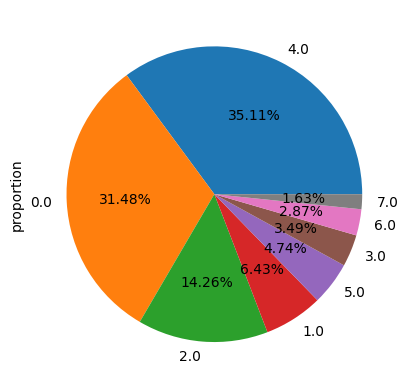

In [64]:
df1['Facing'].value_counts(normalize=True).plot(kind='pie', autopct='%0.2f%%')


In [65]:
x_test = df1[df1['Facing'].isna() == True].drop(columns=['Facing'])

In [66]:
x_train = df1[df1['Facing'].isna() == False].drop(columns=['Facing'])
y_train = df1[df1['Facing'].isna() == False]['Facing']



In [67]:
params = {
    'n_estimators': 800,
    'learning_rate': 0.1,
    'max_depth': 7,
    'min_child_weight': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'gamma': 0,
    'scale_pos_weight': 1,
    'eval_metric': 'logloss'
}

xgb_model = XGBClassifier(**params)

xgb_model.fit(x_train, y_train)

y_pred = xgb_model.predict(x_test)

x_test['Facing'] = y_pred




C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [14:53:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


In [68]:
x_test.sample(3)

,No_Bedroom,No_Bathroom,No_Balcony,Corner_Property,Furnishing,Price_in_Crore,price_Per_Sqft_converted,given_area_in_sqft,floor_number,total_floors,AreaType_Built-up Area,AreaType_Carpet Area,AreaType_Super Built-up Area,study room,servant room,store room,pooja room,Overlooking_others,Overlooking_main road,Overlooking_sea facing,Overlooking_club,Overlooking_park/garden,Overlooking_pool,Overlooking_lake facing,Overlooking_NA,flat_age,sector_num,Facing
6565,3,3.0,2,0,0.0,2.61,23966.0,1850,10,33,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,2,83,4
5108,3,4.0,2,1,1.0,4.18,15112.0,2766,22,33,0,0,1,1,0,0,0,0,1,0,1,1,1,0,0,2,76,4
5630,4,3.0,3,1,1.0,1.20,6486.0,1850,6,14,0,0,1,0,0,0,0,1,1,0,1,1,1,0,0,4,92,2


In [69]:
df.loc[x_test.index , 'Facing'] = x_test['Facing']

In [70]:
df.isna().sum()

Facing                          0
No_Bedroom                      0
No_Bathroom                     0
No_Balcony                      0
Corner_Property                 0
Furnishing                      0
Address                         0
Main Description                0
Nearby Locations                0
Features                        0
Dealer                          0
Society Name                    0
Price_in_Crore                  0
price_Per_Sqft_converted        0
given_area_in_sqft              0
floor_number                    0
total_floors                    0
AreaType_Built-up Area          0
AreaType_Carpet Area            0
AreaType_Super Built-up Area    0
study room                      0
servant room                    0
store room                      0
pooja room                      0
Overlooking_others              0
Overlooking_main road           0
Overlooking_sea facing          0
Overlooking_club                0
Overlooking_park/garden         0
Overlooking_po

<Axes: ylabel='proportion'>

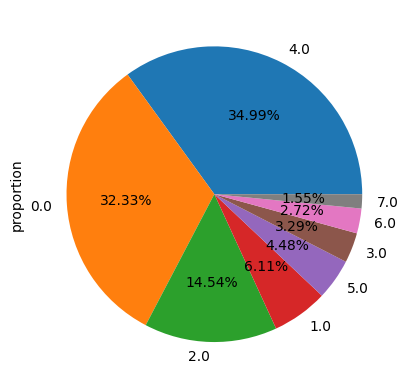

In [71]:
df['Facing'].value_counts(normalize=True).plot(kind='pie', autopct='%0.2f%%')


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12444 entries, 0 to 12446
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Facing                        12444 non-null  float64
 1   No_Bedroom                    12444 non-null  int64  
 2   No_Bathroom                   12444 non-null  float64
 3   No_Balcony                    12444 non-null  int64  
 4   Corner_Property               12444 non-null  int32  
 5   Furnishing                    12444 non-null  float64
 6   Address                       12444 non-null  object 
 7   Main Description              12444 non-null  object 
 8   Nearby Locations              12444 non-null  object 
 9   Features                      12444 non-null  object 
 10  Dealer                        12444 non-null  object 
 11  Society Name                  12444 non-null  object 
 12  Price_in_Crore                12444 non-null  float64
 13  price_

In [73]:
df.to_csv("cleaned_data_v3.csv")

In [74]:
df.sample(3)

,Facing,No_Bedroom,No_Bathroom,No_Balcony,Corner_Property,Furnishing,Address,Main Description,Nearby Locations,Features,Dealer,Society Name,Price_in_Crore,price_Per_Sqft_converted,given_area_in_sqft,floor_number,total_floors,AreaType_Built-up Area,AreaType_Carpet Area,AreaType_Super Built-up Area,study room,servant room,store room,pooja room,Overlooking_others,Overlooking_main road,Overlooking_sea facing,Overlooking_club,Overlooking_park/garden,Overlooking_pool,Overlooking_lake facing,Overlooking_NA,flat_age,sector_num
10829,4.0,3,3.0,4,1,0.0,"sector 86 gurgaon, gurgaon, haryana","Vatika india next plots in sector-83 gurgaon, ...","['Sapphire 83 Mall', 'NH-8, Imt Manesar', 'Rao...","['Water purifier', 'Centrally Air Conditioned'...",kdh real estate,dlf the skycourt,2.1,10886.0,1929,14,19,0,0,1,0,0,1,1,1,1,0,1,1,1,0,0,4,86
4949,4.0,3,3.0,4,0,1.0,"sector 89 gurgaon, sector 89 gurgaon, gurgaon,...",My space is a unique offering that will be a r...,"['Vatika Town Square-INXT', 'Sector 86 Road', ...","['Security / Fire Alarm', 'Intercom Facility',...",limitless realty,m3m soulitude,1.4,9838.0,1423,4,4,0,1,0,0,1,0,1,1,1,0,1,1,1,0,0,1,89
1083,0.0,2,2.0,3,1,1.0,"121, sector 37d gurgaon, gurgaon, haryana",Signature global city 37d\nRediscover a good l...,"['The Esplanade Mall', 'Dwarka Expressway', 'M...","['Centrally Air Conditioned', 'Water purifier'...",onkar real estate solutions,signature global city 37d ph 2,1.2,11320.0,1060,2,4,0,0,1,0,0,1,0,1,1,0,1,1,1,0,0,2,37


In [75]:
df.columns

Index(['Facing', 'No_Bedroom', 'No_Bathroom', 'No_Balcony', 'Corner_Property',
       'Furnishing', 'Address', 'Main Description', 'Nearby Locations',
       'Features', 'Dealer', 'Society Name', 'Price_in_Crore',
       'price_Per_Sqft_converted', 'given_area_in_sqft', 'floor_number',
       'total_floors', 'AreaType_Built-up Area', 'AreaType_Carpet Area',
       'AreaType_Super Built-up Area', 'study room', 'servant room',
       'store room', 'pooja room', 'Overlooking_others',
       'Overlooking_main road', 'Overlooking_sea facing', 'Overlooking_club',
       'Overlooking_park/garden', 'Overlooking_pool',
       'Overlooking_lake facing', 'Overlooking_NA', 'flat_age', 'sector_num'],
      dtype='object')